<a href="https://colab.research.google.com/github/okanbaytekin/DeepLearning/blob/main/ANN_UYGULAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Eğitim seti boyutu : ", x_train.shape, y_train.shape)

Eğitim seti boyutu :  (60000, 28, 28) (60000,)


In [ ]:
print("Test seti boyutu : ", x_test.shape, y_test.shape)

Test seti boyutu :  (10000, 28, 28) (10000,)


In [ ]:
num_labels = len(np.unique(y_train))

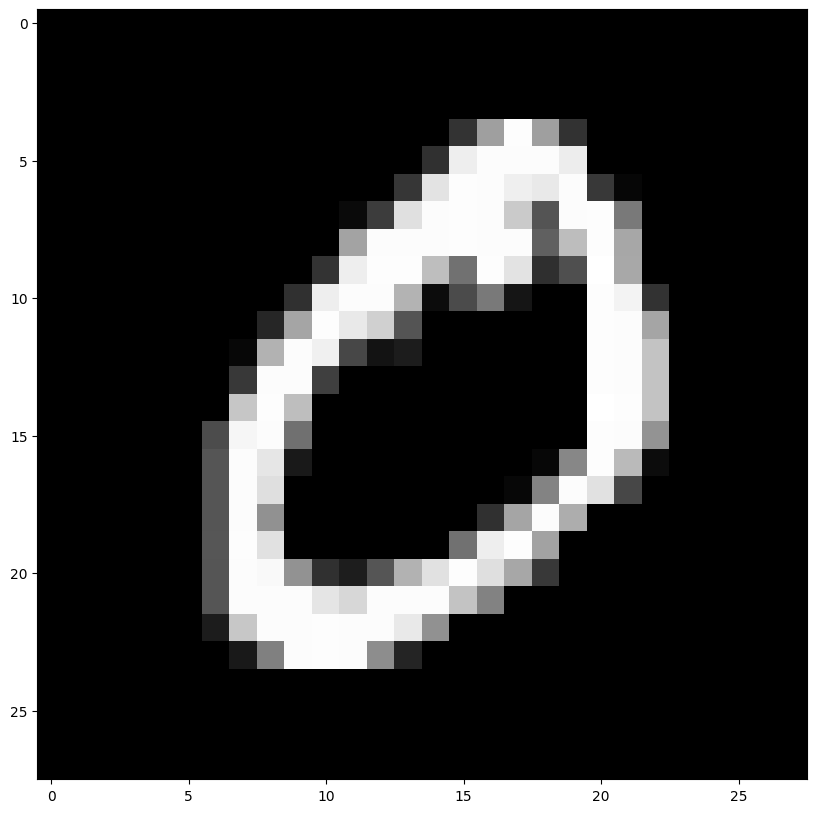

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(x_train[1], cmap='gray')

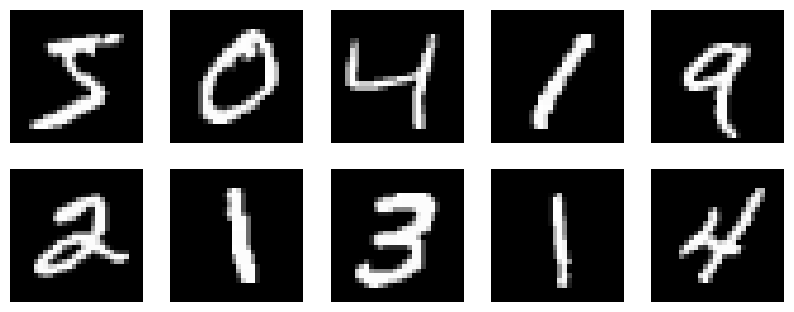

In [ ]:
plt.figure(figsize=(10, 10))

for n in range(10):
  ax = plt.subplot(5, 5, n+1)
  plt.imshow(x_train[n], cmap='gray')
  plt.axis('off')

In [ ]:
def visualize_img(data):
  plt.figure(figsize=(10, 10))
  for n in range(10):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

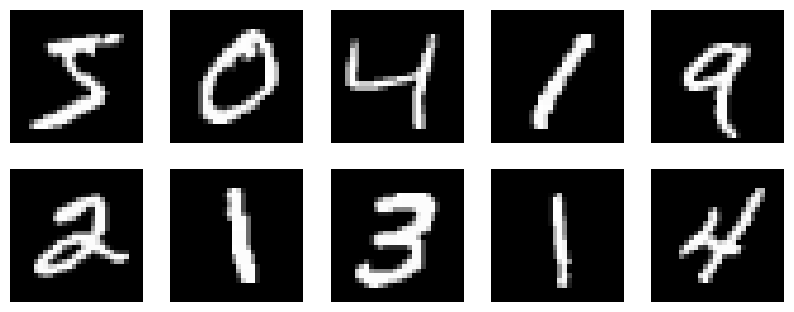

In [ ]:
visualize_img(x_train)

In [ ]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy = (y, x), color='white' if img[x][y]<threshold else 'black')

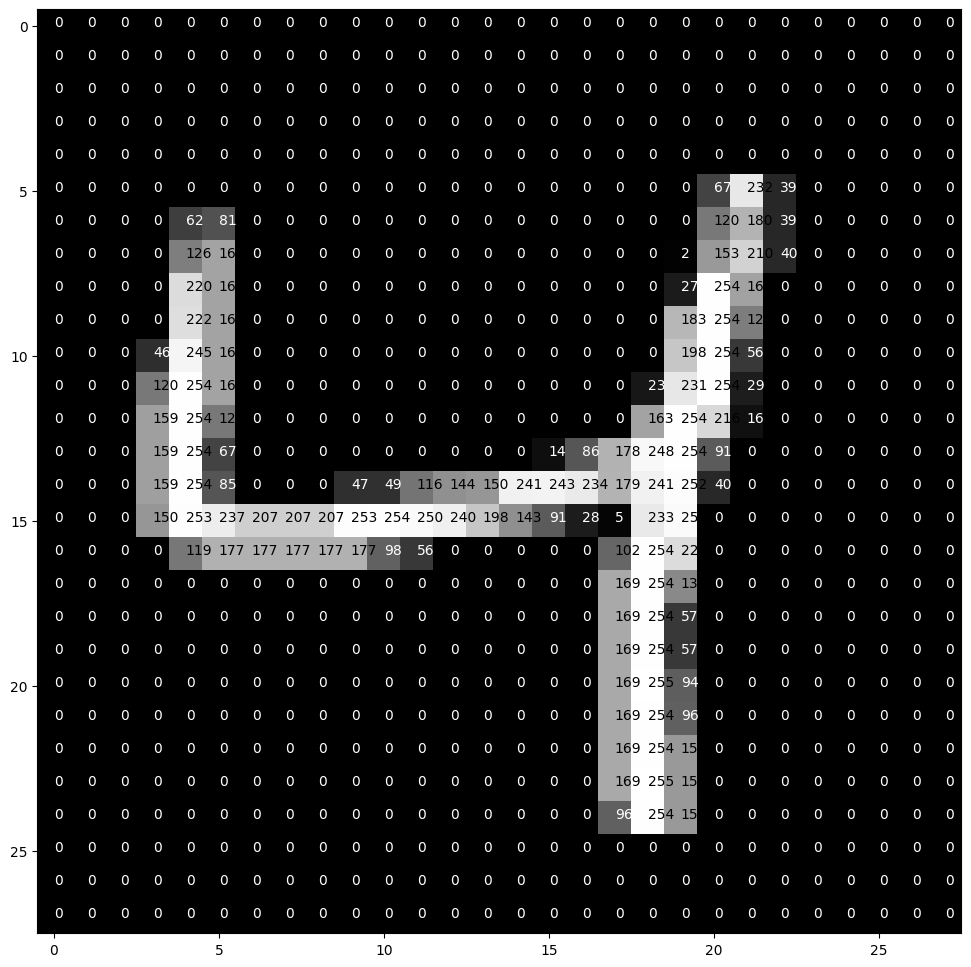

In [ ]:
pixel_visualize(x_train[2])

In [ ]:
# Encoding

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
image_size = x_train.shape[1]

In [ ]:
image_size

28

In [ ]:
print(f"x_train boyutu : {x_train.shape}")
print(f"x_test boyutu : {x_test.shape}")

x_train boyutu : (60000, 28, 28)
x_test boyutu : (10000, 28, 28)


In [ ]:
# Reshaping

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train boyutu : {x_train.shape}")
print(f"x_test boyutu : {x_test.shape}")

x_train boyutu : (60000, 28, 28, 1)
x_test boyutu : (10000, 28, 28, 1)


In [ ]:
# Standardization

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
model = tf.keras.Sequential([Flatten(input_shape=(28, 28, 1)),
                             Dense(units=128, activation='relu', name='layer1'),
                             Dense(units=num_labels, activation='softmax', name='output_layer')])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0591 - precision: 0.9861 - recall: 0.9803 - accuracy: 0.9832 - val_loss: 0.0823 - val_precision: 0.9783 - val_recall: 0.9721 - val_accuracy: 0.9745
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0499 - precision: 0.9883 - recall: 0.9836 - accuracy: 0.9861 - val_loss: 0.0749 - val_precision: 0.9802 - val_recall: 0.9744 - val_accuracy: 0.9768
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0414 - precision: 0.9904 - recall: 0.9865 - accuracy: 0.9884 - val_loss: 0.0714 - val_precision: 0.9810 - val_recall: 0.9759 - val_accuracy: 0.9786
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0359 - precision: 0.9914 - recall: 0.9881 - accuracy: 0.9896 - val_loss: 0.0713 - val_precision: 0.9799 - val_recall: 0.9745 - val_accuracy: 0.9773
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0295 - precision: 0.9929 - r

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0115 - precision: 0.9977 - recall: 0.9972 - accuracy: 0.9974 - val_loss: 0.0733 - val_precision: 0.9816 - val_recall: 0.9792 - val_accuracy: 0.9799
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0101 - precision: 0.9982 - recall: 0.9977 - accuracy: 0.9980 - val_loss: 0.0777 - val_precision: 0.9807 - val_recall: 0.9774 - val_accuracy: 0.9788
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0094 - precision: 0.9981 - recall: 0.9977 - accuracy: 0.9979 - val_loss: 0.0775 - val_precision: 0.9798 - val_recall: 0.9775 - val_accuracy: 0.9784
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0076 - precision: 0.9987 - recall: 0.9983 - accuracy: 0.9985 - val_loss: 0.0715 - val_precision: 0.9822 - val_recall: 0.9803 - val_accuracy: 0.9812
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0054 - precision: 0.9993 - 

Text(0.5, 1.0, 'Train & Test Loss Graphics')

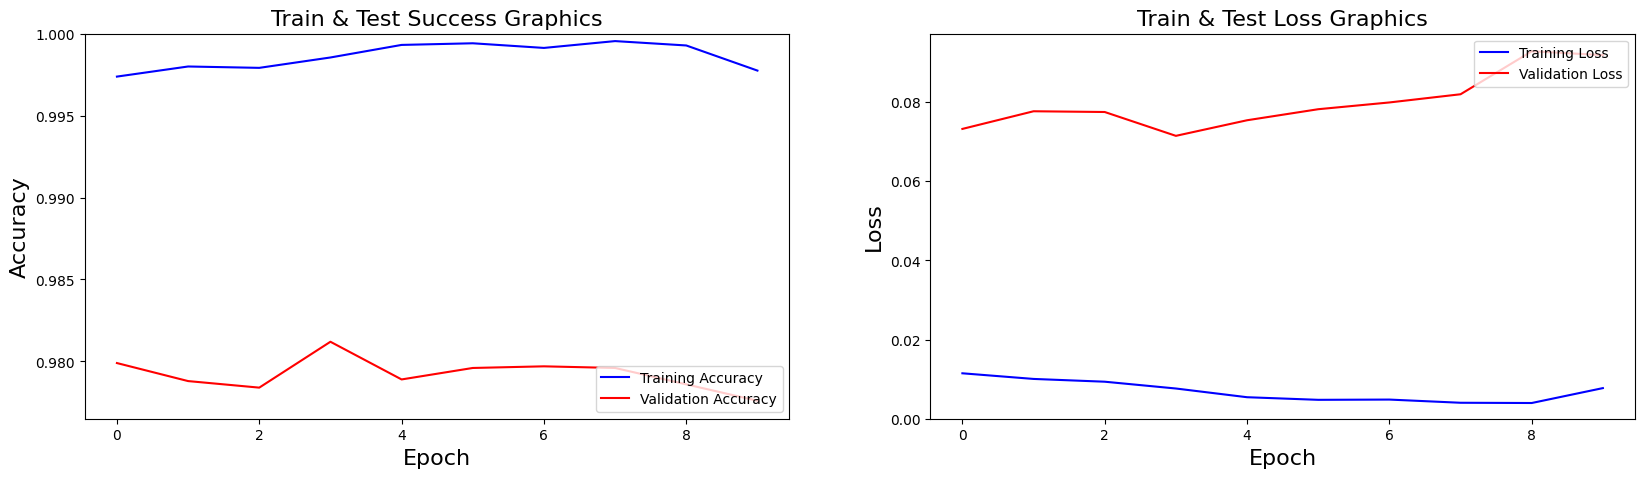

In [ ]:
#################################################
########### Accuracy & Loss Graphics ############
#################################################

#---------------Graphic-1 Accuracy--------------#

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Train & Test Success Graphics', fontsize=16)

#-----------------Graphic-2 Loss----------------#

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Train & Test Loss Graphics', fontsize=16)

In [ ]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)

print("\n Test Accuracy : %.1f%%" % (100.0 * acc))
print("\n Test Loss : %.1f%%" % (100.0 * loss))
print("\n Test Precision : %.1f%%" % (100.0 * precision))
print("\n Test Recall : %.1f%%" % (100.0 * recall))


 Test Accuracy : 97.8%

 Test Loss : 9.2%

 Test Precision : 97.9%

 Test Recall : 97.7%


In [ ]:
model.save('mnist_model.h5')

In [ ]:
import random

random = random.randint(0, x_test.shape[0])

In [ ]:
random

3691

In [ ]:
test_image = x_test[random]

In [ ]:
y_test[random]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

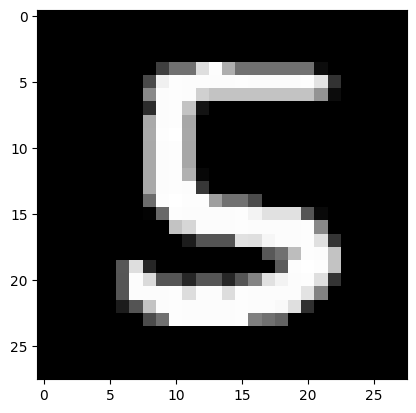

In [ ]:
plt.imshow(test_image.reshape(28, 28), cmap='gray');

In [ ]:
test_data = x_test[random].reshape(1, 28, 28, 1)

In [ ]:
probablity = model.predict(test_data)

1/1 [==============================] - 1s 553ms/step


In [ ]:
predicted_classes = np.argmax(probablity)

In [ ]:
predicted_classes

5